In [32]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Exception reporting mode: Minimal


In [33]:

ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [34]:
da= ds.air

da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [35]:
da.attrs
# assign yourown attributes!
da.attrs["who_is_awesome"] = "xarray"
da.attrs
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [36]:
type((da.data))

numpy.ndarray

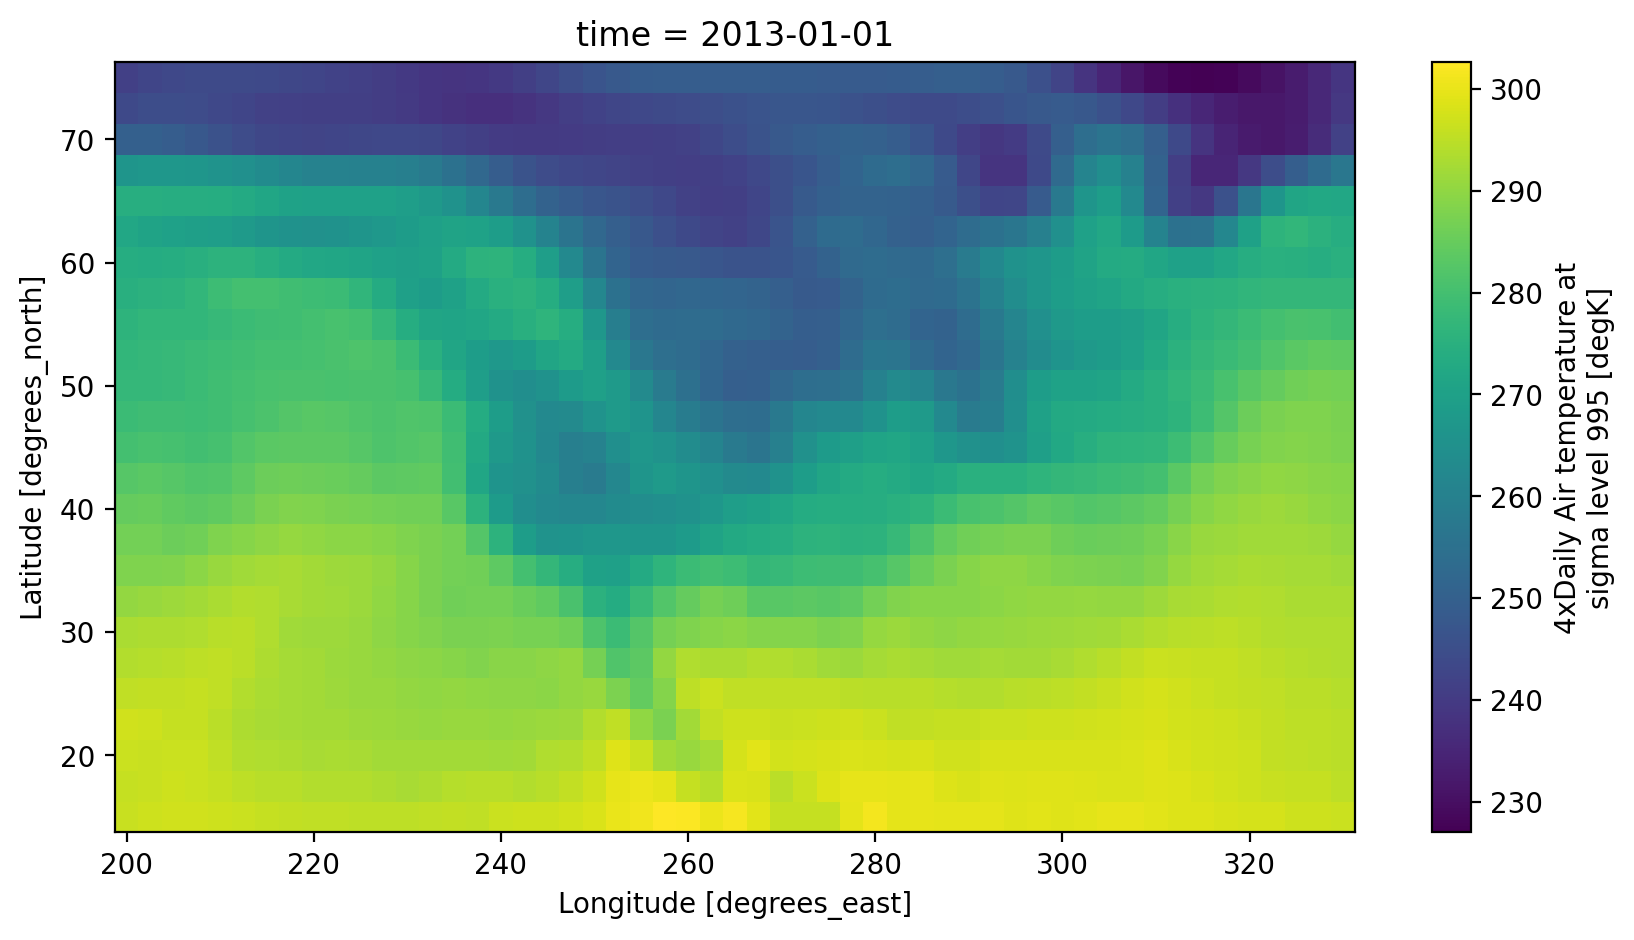

In [37]:
da.isel(time=0).plot(x="lon", y="lat", figsize=(10, 5))

In [38]:
da.data

array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[245.79, 244.79, ..., 243.99, 244.79],
        [249.89, 249.29, ..., 242.49, 244.29],
        ...,
        [296.29, 297.19, ..., 295.09, 294.39],
        [297.79, 298.39, ..., 295.49, 295.19]],

       [[245.09, 244.29, ..., 241.49, 241.79],
        [249.89, 249.29, ..., 240.29, 241.69],
        ...,
        [296.09, 296.89, ..., 295.69, 295.19],
        [297.69, 298.09, ..., 296.19, 295.69]]])

In [39]:
ds.sel(time="2013-05")

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 1MB 259.2 259.3 259.1 ... 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [40]:
ds.isel(time=slice(0, 5))


<xarray.Dataset> Size: 53kB
Dimensions:  (lat: 25, time: 5, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 40B 2013-01-01 ... 2013-01-02
Data variables:
    air      (time, lat, lon) float64 53kB 241.2 242.5 243.5 ... 297.4 297.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [41]:
ds.sel(lon=240.2, method="nearest")
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

ds.air. data[0,2,3]
ds.air.isel(time=0, lat=2, lon=3)

<xarray.DataArray 'air' ()> Size: 8B
247.5
Coordinates:
    lat      float32 4B 70.0
    lon      float32 4B 207.5
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [42]:
# Earth's average radius in meters
R = 6.371e6

# Coordinate spacing for this dataset is 2.5 x 2.5 degrees
dϕ = np.deg2rad(2.5) #这里把经纬度转换为弧度
dλ = np.deg2rad(2.5)

dlat = R * dϕ * xr.ones_like(ds.air.lon)
dlon = R * dλ * np.cos(np.deg2rad(ds.air.lat))
dlon.name = "dlon"
dlat.name = "dlat"

In [43]:
dlon

<xarray.DataArray 'dlon' (lat: 25)> Size: 100B
7.195e+04 8.359e+04 9.508e+04 1.064e+05 ... 2.612e+05 2.651e+05 2.685e+05
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [44]:
dlat


<xarray.DataArray 'dlat' (lon: 53)> Size: 212B
2.78e+05 2.78e+05 2.78e+05 2.78e+05 ... 2.78e+05 2.78e+05 2.78e+05 2.78e+05
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [45]:
ds.air.lon.data

array([200. , 202.5, ..., 327.5, 330. ], dtype=float32)

In [46]:
np.cos(np.deg2rad(ds.lat))


<xarray.DataArray 'lat' (lat: 25)> Size: 100B
0.2588 0.3007 0.342 0.3827 0.4226 0.4617 ... 0.9063 0.9239 0.9397 0.9537 0.9659
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [47]:
cell_area = dlon * dlat
cell_area.data

array([[2.0000748e+10, 2.0000748e+10, ..., 2.0000748e+10, 2.0000748e+10],
       [2.3237628e+10, 2.3237628e+10, ..., 2.3237628e+10, 2.3237628e+10],
       ...,
       [7.3700336e+10, 7.3700336e+10, ..., 7.3700336e+10, 7.3700336e+10],
       [7.4643800e+10, 7.4643800e+10, ..., 7.4643800e+10, 7.4643800e+10]],
      dtype=float32)

# Alignment

In [48]:
ds.air.isel(time=1) / cell_area

<xarray.DataArray (lat: 25, lon: 53)> Size: 11kB
1.21e-08 1.213e-08 1.215e-08 1.217e-08 ... 3.971e-09 3.971e-09 3.974e-09
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01T06:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [49]:
cell_area_bad = cell_area.copy(deep=True)
cell_area_bad["lat"] = cell_area.lat + 1e-5  # latitudes are off by 1e-5 degrees!
cell_area_bad.data


array([[2.0000748e+10, 2.0000748e+10, ..., 2.0000748e+10, 2.0000748e+10],
       [2.3237628e+10, 2.3237628e+10, ..., 2.3237628e+10, 2.3237628e+10],
       ...,
       [7.3700336e+10, 7.3700336e+10, ..., 7.3700336e+10, 7.3700336e+10],
       [7.4643800e+10, 7.4643800e+10, ..., 7.4643800e+10, 7.4643800e+10]],
      dtype=float32)

In [50]:
cell_area_bad * ds.air.isel(time=1)

<xarray.DataArray (lat: 0, lon: 53)> Size: 0B

Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * lat      (lat) float32 0B 
    time     datetime64[ns] 8B 2013-01-01T06:00:00
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [51]:
ds.groupby("time.season")
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset> Size: 43kB
Dimensions:  (lat: 25, season: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float64 42kB 247.0 247.0 246.7 ... 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

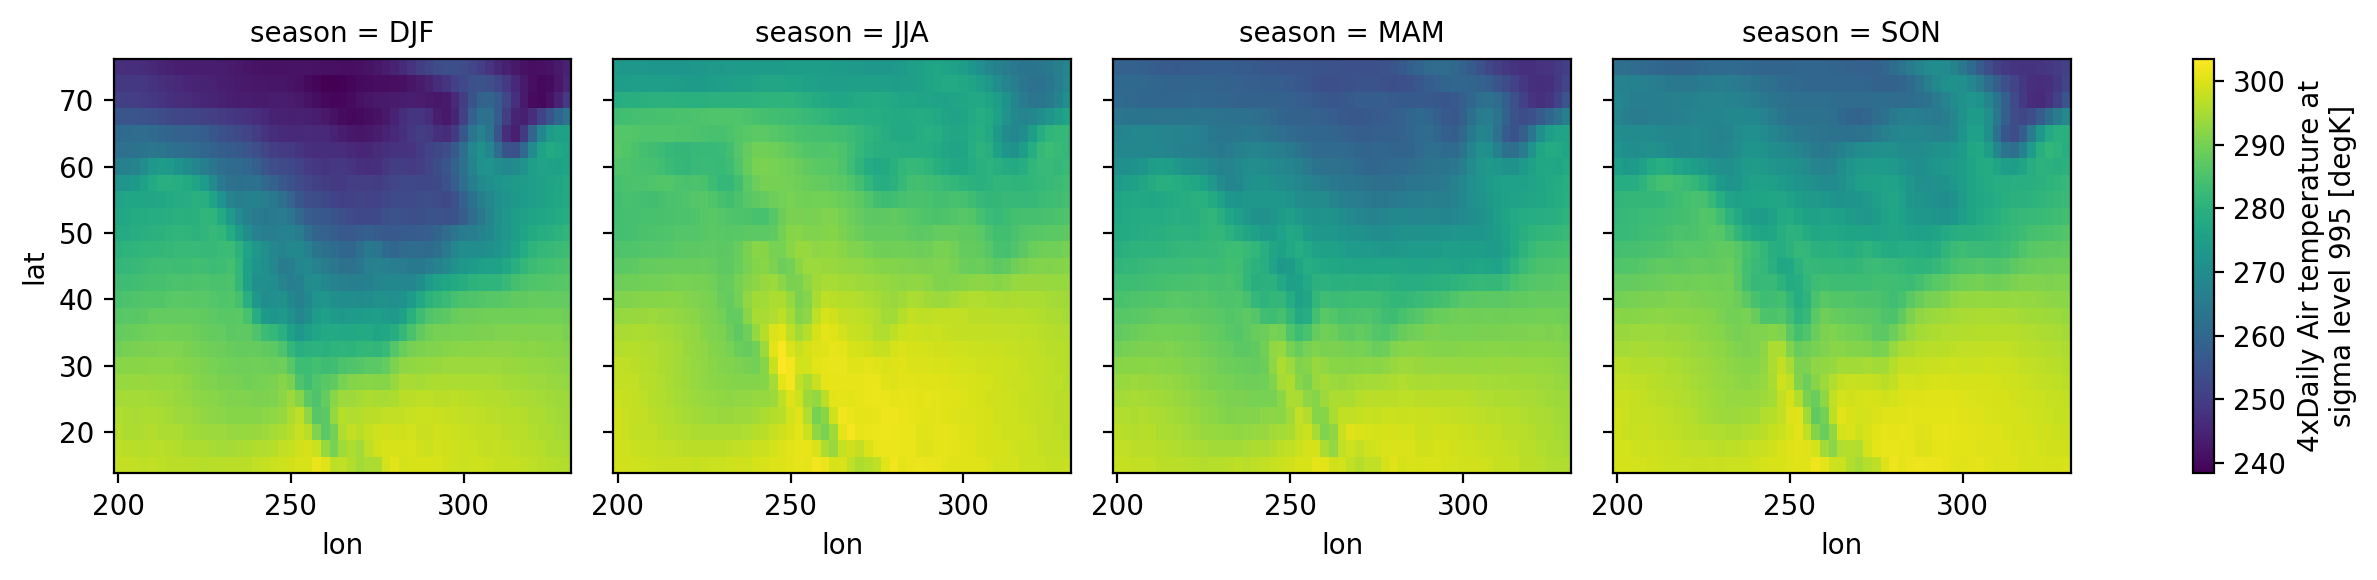

In [52]:
seasonal_mean.air.plot(col="season")


In [53]:
ds.resample(time="M").mean()


<string>:6: FutureWarning: 'M' is deprecated and will be removed in a future version. Please use 'ME' instead of 'M'.


<xarray.Dataset> Size: 255kB
Dimensions:  (lat: 25, time: 24, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 192B 2013-01-31 2013-02-28 ... 2014-12-31
Data variables:
    air      (time, lat, lon) float64 254kB 244.5 244.7 244.7 ... 297.7 297.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

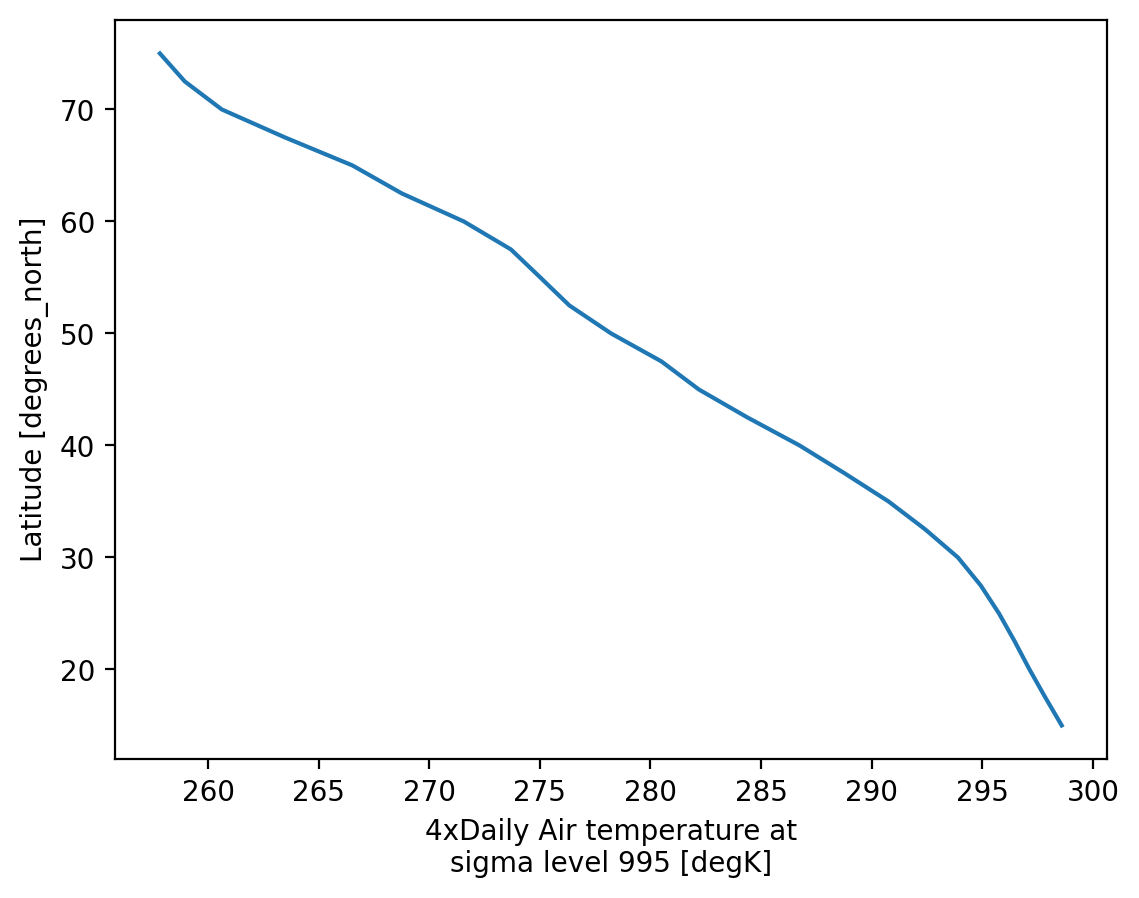

In [54]:
ds.weighted(cell_area).mean(["lon", "time"]).air.plot(y="lat");


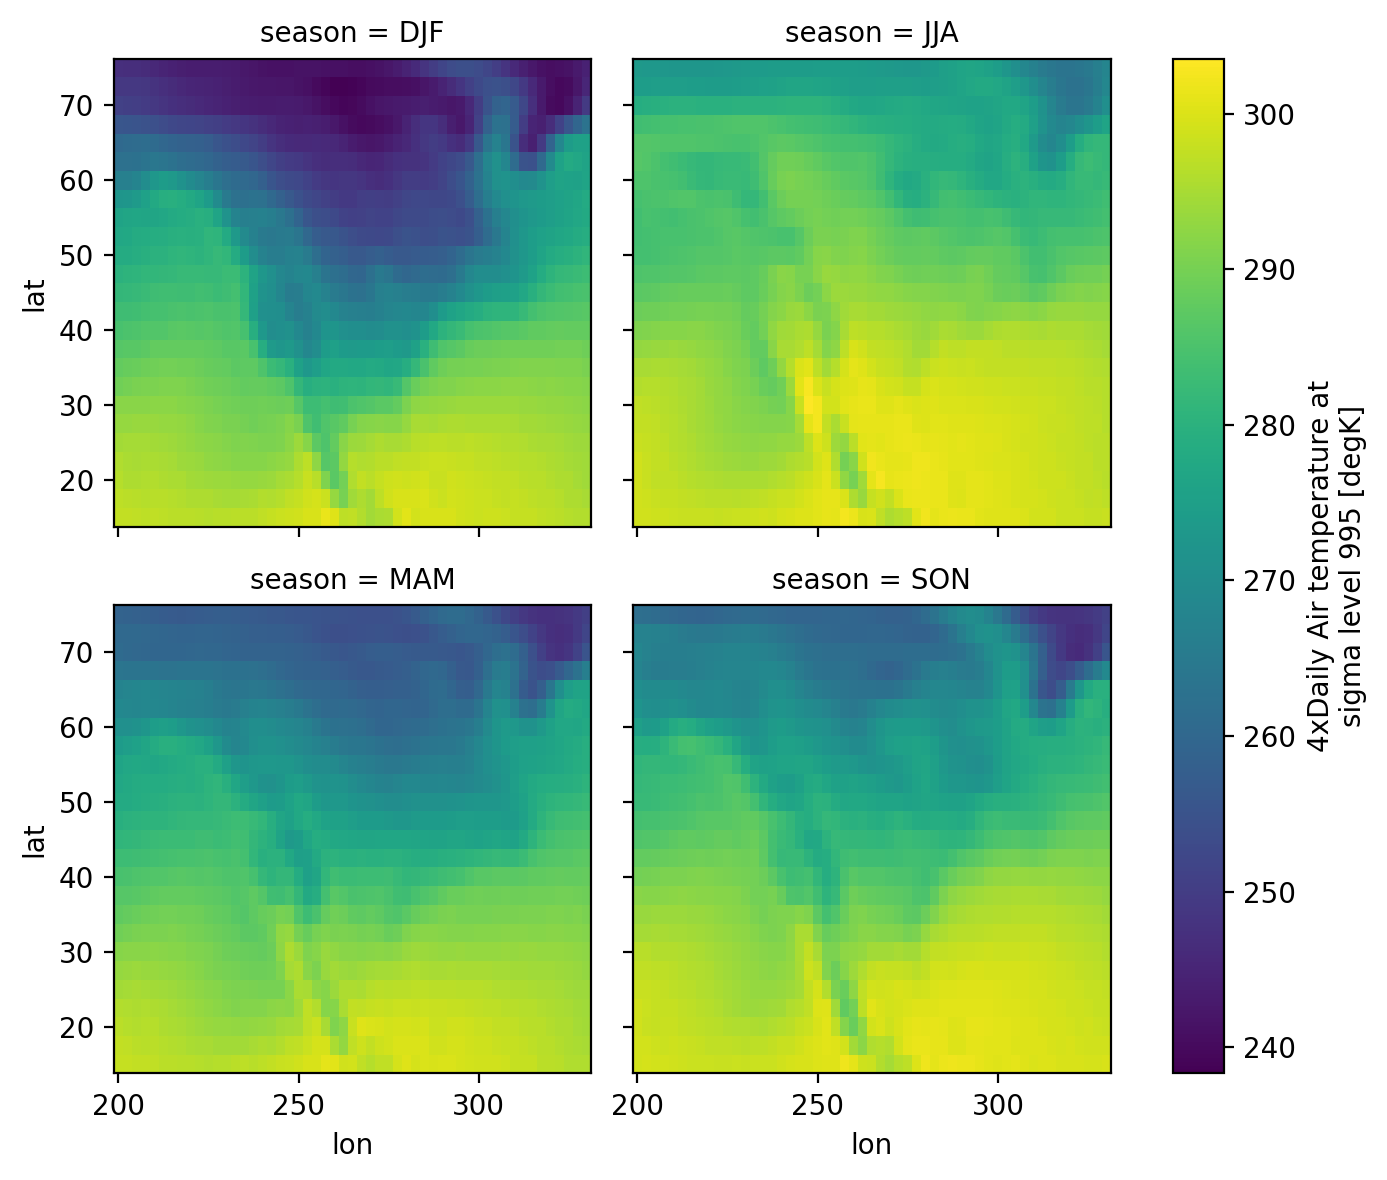

In [55]:
seasonal_mean.air.plot(col="season", col_wrap=2);


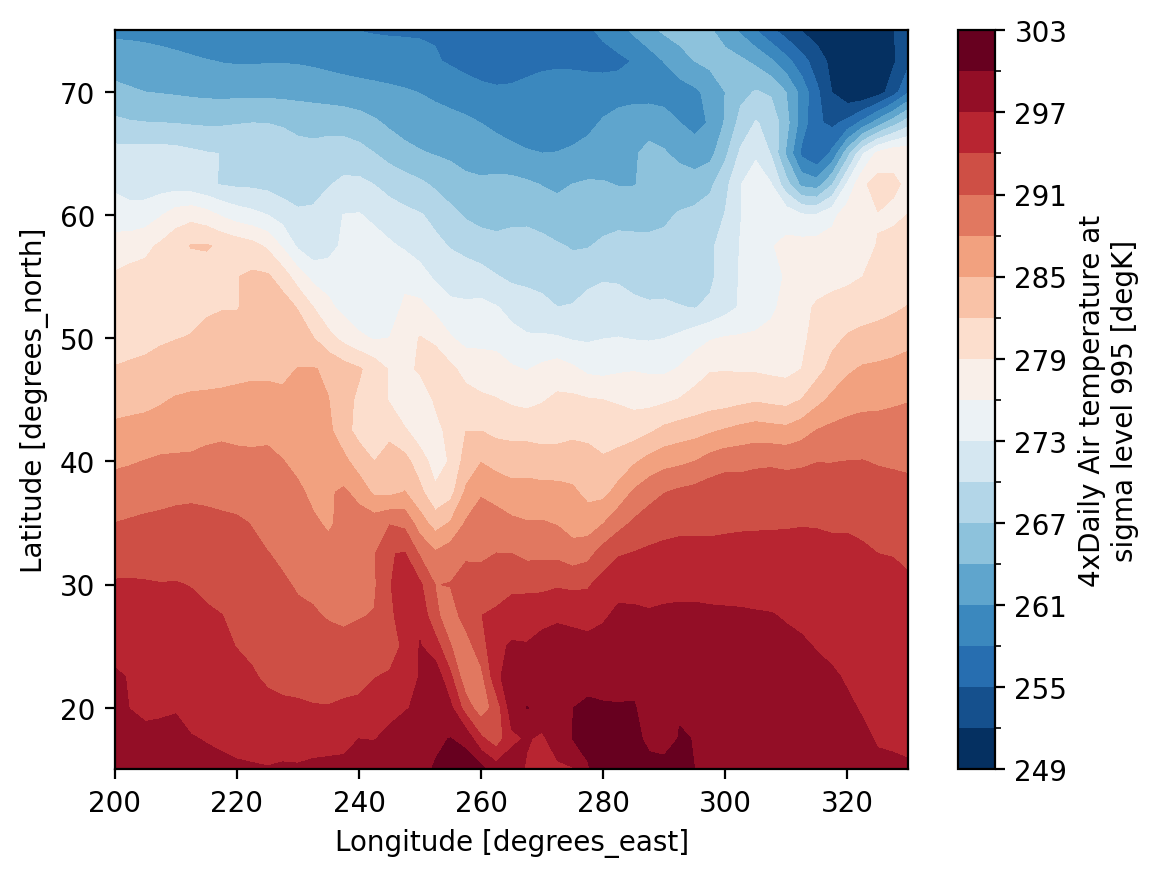

In [56]:
# contours
ds2=seasonal_mean.weighted(cell_area).mean('season')
ds2.air.plot.contourf(x="lon", y="lat", levels=20, cmap="RdBu_r")

# 





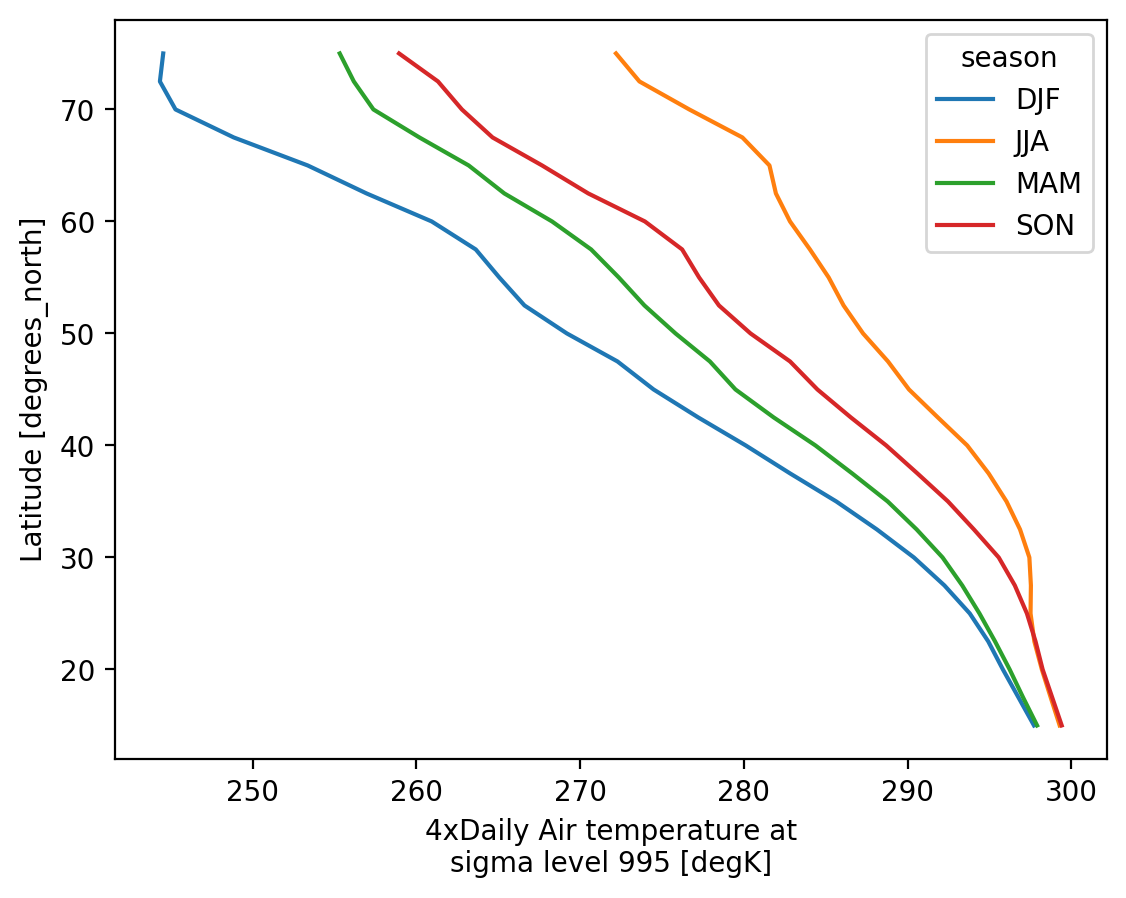

In [57]:
seasonal_mean.air.mean("lon").plot.line(hue="season", y="lat");


In [58]:
df = ds.isel(time=slice(2)).to_dataframe() #截取时间维度
df

air
lat  time                lon         
75.0 2013-01-01 00:00:00 200.0  241.2
                         202.5  242.5
                         205.0  243.5
                         207.5  244.0
                         210.0  244.1
...                               ...
15.0 2013-01-01 06:00:00 320.0  297.1
                         322.5  296.9
                         325.0  296.4
                         327.5  296.4
                         330.0  296.6

[2650 rows x 1 columns]

In [59]:
dask= xr.tutorial.open_dataset("air_temperature",
                               chunks={"time": 10})
dask.air

dask.air.mean("lon").compute()






<xarray.DataArray 'air' (time: 2920, lat: 25)> Size: 584kB
242.0 242.0 243.7 251.2 257.2 260.8 ... 292.3 294.4 295.8 297.0 297.9 298.8
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [70]:
import hvplot.xarray


ds.hvplot(groupby="time", clim=(250, 300), widget_location='bottom')



BokehModel(combine_events=True, render_bundle={'docs_json': {'5f041b7c-4a96-4a5f-a7c6-d797b6554e5c': {'version…

In [80]:
import numpy as np
import xarray as xr
import pandas as pd

# When working in a Jupyter Notebook you might want to customize Xarray display settings to your liking
# The following settings reduce the amount of data displayed out by default
xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)
series = np.ones([2,3])
series

array([[1., 1., 1.],
       [1., 1., 1.]])

In [84]:
import numpy as np
import pandas as pd
import xarray as xr

xr.set_options(display_expand_data=False)

rng = np.random.default_rng(seed=0)  # we'll use this later

xr.DataArray(
    rng.random((180, 360)) * 400,
    dims=("latitude", "longitude"),
    coords={
        "latitude": ("latitude", np.arange(-90, 90, 1), {"type": "geodetic"}),
        "longitude": (
            "longitude",
            np.arange(-180, 180, 1),
            {"prime_meridian": "greenwich"},
        ),
    },
    attrs={"type": "ellipsoid"},
    name="height",
)

<xarray.DataArray 'height' (latitude: 180, longitude: 360)> Size: 518kB
254.8 107.9 16.39 6.611 325.3 365.1 ... 77.56 224.5 325.4 130.9 101.7 159.5
Coordinates:
  * latitude   (latitude) int32 720B -90 -89 -88 -87 -86 -85 ... 85 86 87 88 89
  * longitude  (longitude) int32 1kB -180 -179 -178 -177 ... 176 177 178 179
Attributes: (1)